# Regression Week 1: Simple Linear Regression

In this notebook we will use data on house sales in King County to predict house prices using simple (one input) linear regression. You will:
* Use Turi Create SArray and SFrame functions to compute important summary statistics
* Write a function to compute the Simple Linear Regression weights using the closed form solution
* Write a function to make predictions of the output given the input feature
* Turn the regression around to predict the input given the output
* Compare two different models for predicting house prices

In this notebook you will be provided with some already complete code as well as some code that you should complete yourself in order to answer quiz questions. The code we provide to complte is optional and is there to assist you with solving the problems but feel free to ignore the helper code and write your own.

# Fire up Turi Create

In [1]:
import turicreate
import numpy as np

# Load house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [3]:
sales = turicreate.SFrame('~/Desktop/2.self_learning/coursera_washington/module2_regression/data/home_data.sframe')
sales.head(2)

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 2

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 7129300520 | 2014-10-13 00:00:00+00:00 | 221900.0 |   3.0    |    1.0    |
| 6414100192 | 2014-12-09 00:00:00+00:00 | 538000.0 |   3.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    1180.0   |  5650.0  |  1.0   |     0      |  0   |     3     |  7.0  |
|    2570.0   |  7242.0  |  2.0   |     0      |  0   |     3     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1180.0   |      0.0      |  1955.0  |     0.0      |  98178  | 47.51123398 |
|   2170.0   |     400.0     |  1951.0  |    1991.0    |  98125  | 47.72102274 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.25677536 |     1340.0    | ... |
|  -122.3188624 |     1690.0    | ... |
+---------------+---------------+-----+
[2 rows x 21 columns]

# Split data into training and testing

We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let Turi Create pick a random seed for you).  

In [8]:
train_data,test_data = sales.random_split(.8,seed=0)

# Useful SFrame summary functions

In order to make use of the closed form solution as well as take advantage of turi create's built in functions we will review some important ones. In particular:
* Computing the sum of an SArray
* Computing the arithmetic average (mean) of an SArray
* multiplying SArrays by constants
* multiplying SArrays by other SArrays

In [4]:
# Let's compute the mean of the House Prices in King County in 2 different ways.
prices = sales['price'] # extract the price column of the sales SFrame -- this is now an SArray

# recall that the arithmetic average (the mean) is the sum of the prices divided by the total number of houses:
sum_prices = prices.sum()
num_houses = len(prices) # when prices is an SArray len() returns its length
avg_price_1 = sum_prices/num_houses
avg_price_2 = prices.mean() # if you just want the average, the .mean() function
print( "average price via method 1: " + str(avg_price_1))
print("average price via method 2: " + str(avg_price_2))

average price via method 1: 540088.1419053348
average price via method 2: 540088.1419053345


As we see we get the same answer both ways

In [5]:
# if we want to multiply every price by 0.5 it's a simple as:
half_prices = 0.5*prices
# Let's compute the sum of squares of price. We can multiply two SArrays of the same length elementwise also with *
prices_squared = prices*prices
sum_prices_squared = prices_squared.sum() # price_squared is an SArray of the squares and we want to add them up.
print ("the sum of price squared is: " + str(sum_prices_squared))

the sum of price squared is: 9217325133550736.0


Aside: The python notation x.xxe+yy means x.xx \* 10^(yy). e.g 100 = 10^2 = 1*10^2 = 1e2 

# Build a generic simple linear regression function 

Armed with these SArray functions we can use the closed form solution found from lecture to compute the slope and intercept for a simple linear regression on observations stored as SArrays: input_feature, output.

Complete the following function (or write your own) to compute the simple linear regression slope and intercept:

### closed form example

In [30]:
from IPython.display import Image

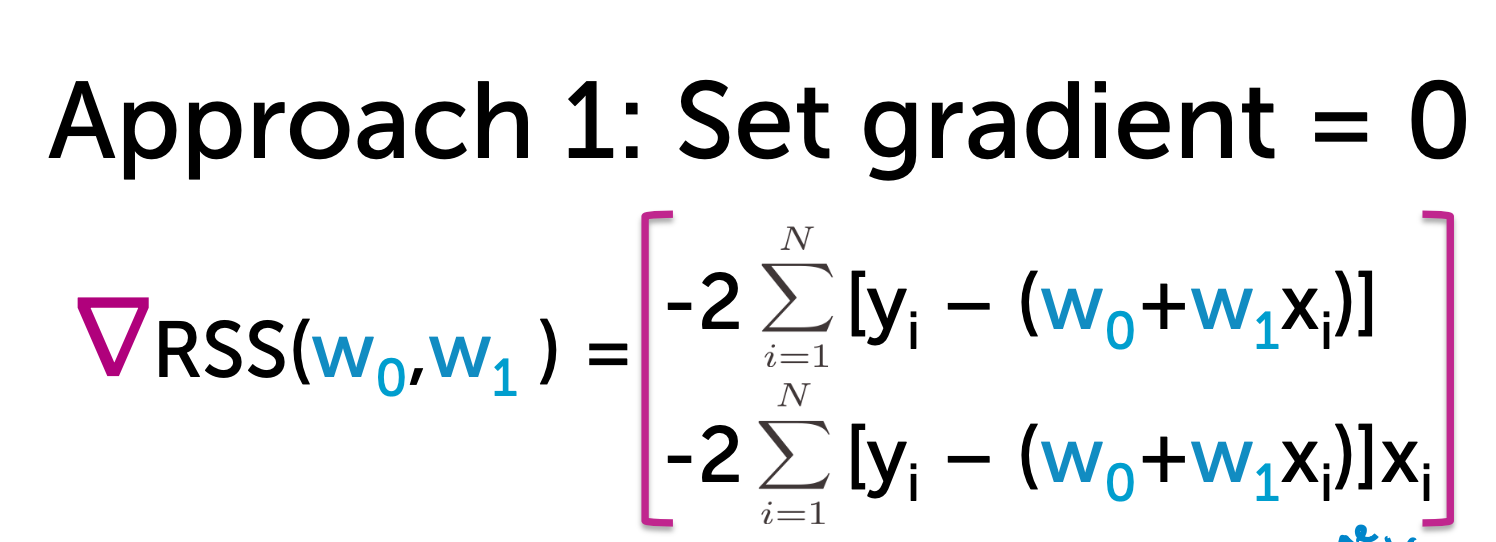

In [34]:
Image(filename='close_form_concept.png')

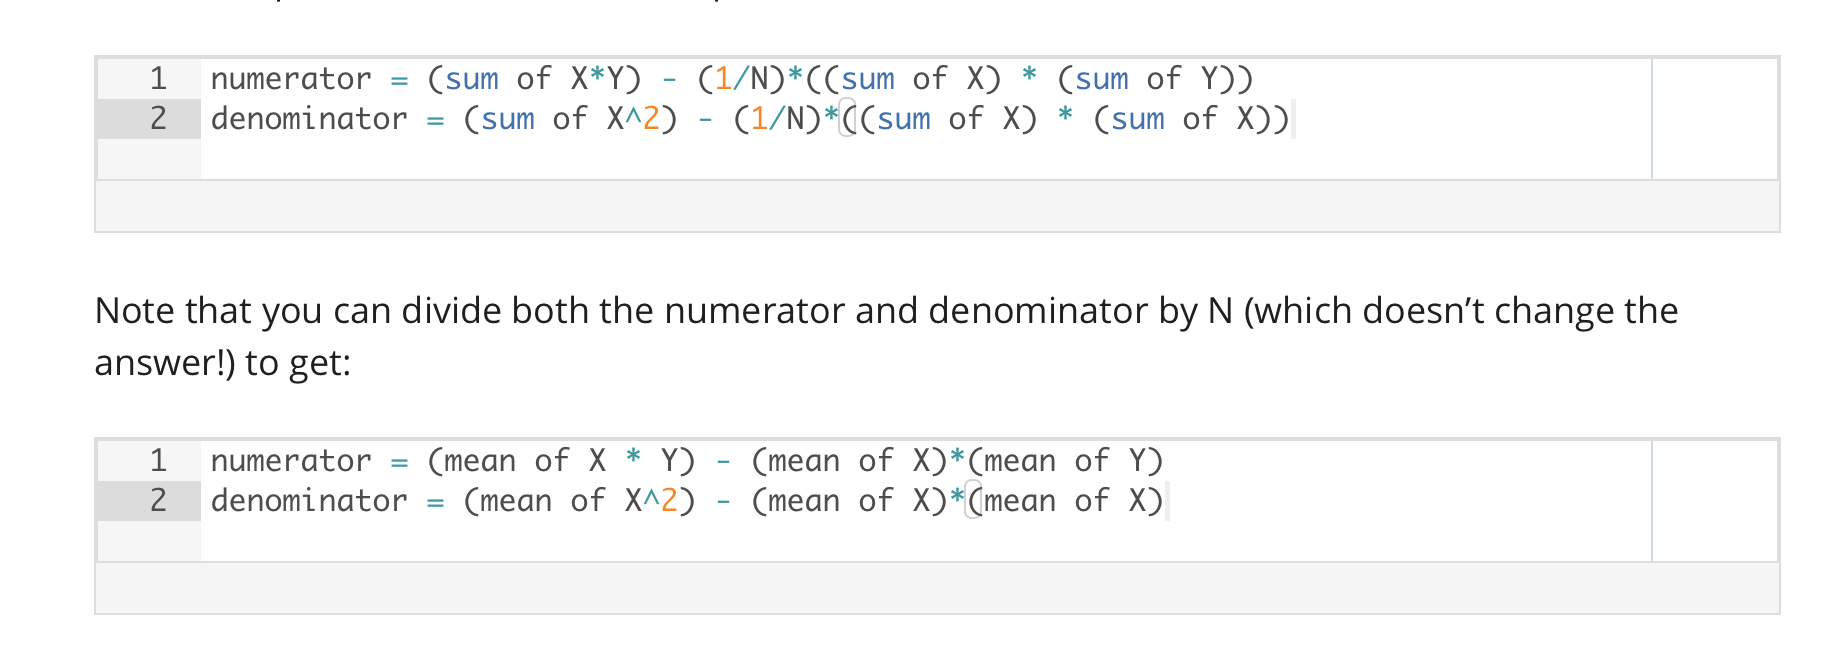

In [35]:
Image(filename='close_form.png')

slope = numerator / denominator
intercept = (mean of y) - slope * (mean of x)

In [28]:
def simple_linear_regression_closed(x_feature, output):
    
    x_sum  = x_feature.sum()
    y_sum  = output.sum()
    x_mean = x_feature.mean()
    y_mean = output.mean()
    
    x_multiply_y = x_feature * output
    xy_sum = x_multiply_y.sum()
    xy_mean = x_multiply_y.mean()

    xx = x_feature * x_feature
    sum_xx = xx.sum()
    
    
    # use the formula for the slope
    numerator = (xy_sum - (1/len(x_feature)) * (x_sum) * (y_sum))
    denominator = (sum_xx - (1/len(x_feature)) * (x_sum) * (x_sum))
    slope = numerator / denominator
    # use the formula for the intercept
    
    intercept = y_mean - slope * x_mean
    
    return (intercept, slope)

We can test that our function works by passing it something where we know the answer. In particular we can generate a feature and then put the output exactly on a line: output = 1 + 1\*input_feature then we know both our slope and intercept should be 1

In [48]:
test_feature = np.array([0,1,2,3,4])
test_output = np.array([1,3,7,13,21])
(test_intercept, test_slope) =  simple_linear_regression_closed(test_feature, test_output)
print ("Intercept: " + str(test_intercept))
print ("Slope: " + str(test_slope))

Intercept: -1.0
Slope: 5.0


Now that we know it works let's build a regression model for predicting price based on sqft_living. Rembember that we train on train_data!

In [40]:
sqft_intercept, sqft_slope = simple_linear_regression_closed(train_data['sqft_living'], train_data['price'])

print ("Intercept: " + str(sqft_intercept))
print ("Slope: " + str(sqft_slope))

Intercept: -47116.076574939885
Slope: 281.9588385676974


### gradient descent

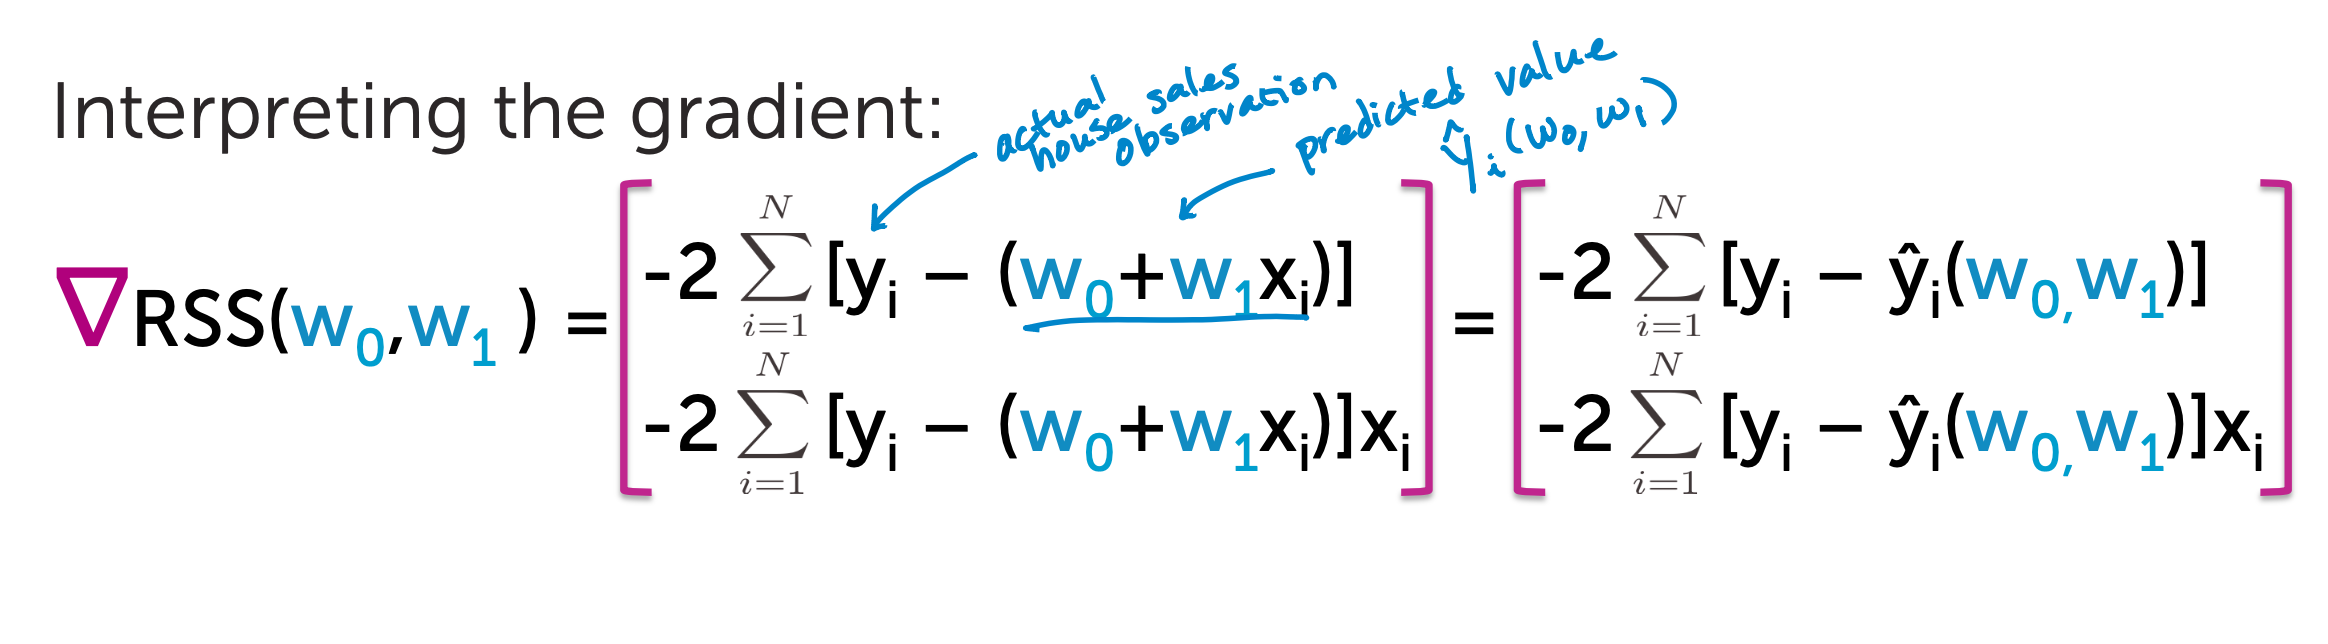

In [37]:
Image(filename='gradient_descent_concept.png')

# Predicting Values

Now that we have the model parameters: intercept & slope we can make predictions. Using SArrays it's easy to multiply an SArray by a constant and add a constant value. Complete the following function to return the predicted output given the input_feature, slope and intercept:

In [41]:
def get_regression_predictions(input_feature, intercept, slope):
    predicted_values = slope * input_feature + intercept
    
    return predicted_values

Now that we can calculate a prediction given the slope and intercept let's make a prediction. Use (or alter) the following to find out the estimated price for a house with 2650 squarefeet according to the squarefeet model we estiamted above.

**Quiz Question: Using your Slope and Intercept from (4), What is the predicted price for a house with 2650 sqft?**

In [44]:
my_house_sqft = 2650
estimated_price = get_regression_predictions(my_house_sqft, sqft_intercept, sqft_slope)
print ("The estimated price for a house with %d squarefeet is $%.2f" % (my_house_sqft, estimated_price))

The estimated price for a house with 2650 squarefeet is $700074.85


# Residual Sum of Squares

Now that we have a model and can make predictions let's evaluate our model using Residual Sum of Squares (RSS). Recall that RSS is the sum of the squares of the residuals and the residuals is just a fancy word for the difference between the predicted output and the true output. 

Complete the following (or write your own) function to compute the RSS of a simple linear regression model given the input_feature, output, intercept and slope:

In [53]:
def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    
    # First get the predictions
    predicted_values = slope * input_feature + intercept
    
    # then compute the residuals (since we are squaring it doesn't matter which order you subtract)
    var = predicted_values - output
    var_square = var * var
    
    # square the residuals and add them up
    RSS = var_square.sum()
    
    
    return(RSS)

Let's test our get_residual_sum_of_squares function by applying it to the test model where the data lie exactly on a line. Since they lie exactly on a line the residual sum of squares should be zero!

In [54]:
print (get_residual_sum_of_squares(test_feature, test_output, test_intercept, test_slope)) # should be 0.0

14.0


Now use your function to calculate the RSS on training data from the squarefeet model calculated above.

**Quiz Question: According to this function and the slope and intercept from the squarefeet model What is the RSS for the simple linear regression using squarefeet to predict prices on TRAINING data?**

In [55]:
rss_prices_on_sqft = get_residual_sum_of_squares(train_data['sqft_living'], train_data['price'], sqft_intercept, sqft_slope)
print ('The RSS of predicting Prices based on Square Feet is : ' + str(rss_prices_on_sqft))

The RSS of predicting Prices based on Square Feet is : 1201918356321967.0


# Predict the squarefeet given price

What if we want to predict the squarefoot given the price? Since we have an equation y = a + b\*x we can solve the function for x. So that if we have the intercept (a) and the slope (b) and the price (y) we can solve for the estimated squarefeet (x).

Complete the following function to compute the inverse regression estimate, i.e. predict the input_feature given the output.

In [56]:
def inverse_regression_predictions(output, intercept, slope):
    # solve output = intercept + slope*input_feature for input_feature. Use this equation to compute the inverse predictions:
    estimated_feature = ((output - intercept) / slope)
    return estimated_feature

Now that we have a function to compute the squarefeet given the price from our simple regression model let's see how big we might expect a house that costs $800,000 to be.

**Quiz Question: According to this function and the regression slope and intercept from (3) what is the estimated square-feet for a house costing $800,000?**

In [57]:
my_house_price = 800000
estimated_squarefeet = inverse_regression_predictions(my_house_price, sqft_intercept, sqft_slope)
print ("The estimated squarefeet for a house worth $%.2f is %d" % (my_house_price, estimated_squarefeet))

The estimated squarefeet for a house worth $800000.00 is 3004


# New Model: estimate prices from bedrooms

We have made one model for predicting house prices using squarefeet, but there are many other features in the sales SFrame. 
Use your simple linear regression function to estimate the regression parameters from predicting Prices based on number of bedrooms. Use the training data!

In [60]:
# Estimate the slope and intercept for predicting 'price' based on 'bedrooms'
(bed_intercept, bed_slope) = simple_linear_regression_closed(train_data["bedrooms"],
                                                             train_data["price"])

# Test your Linear Regression Algorithm

Now we have two models for predicting the price of a house. How do we know which one is better? Calculate the RSS on the TEST data (remember this data wasn't involved in learning the model). Compute the RSS from predicting prices using bedrooms and from predicting prices using squarefeet.

**Quiz Question: Which model (square feet or bedrooms) has lowest RSS on TEST data? Think about why this might be the case.**

In [61]:
# Compute RSS when using bedrooms on TEST data:
get_residual_sum_of_squares(test_data['bedrooms'], test_data['price'], bed_intercept,bed_slope)

493364582868288.0

In [62]:
# Compute RSS when using squarefeet on TEST data:
get_residual_sum_of_squares(test_data['sqft_living'], test_data['price'], sqft_intercept,sqft_slope)

275402936247141.44